<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastián Andrés Bustos Vásquez</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

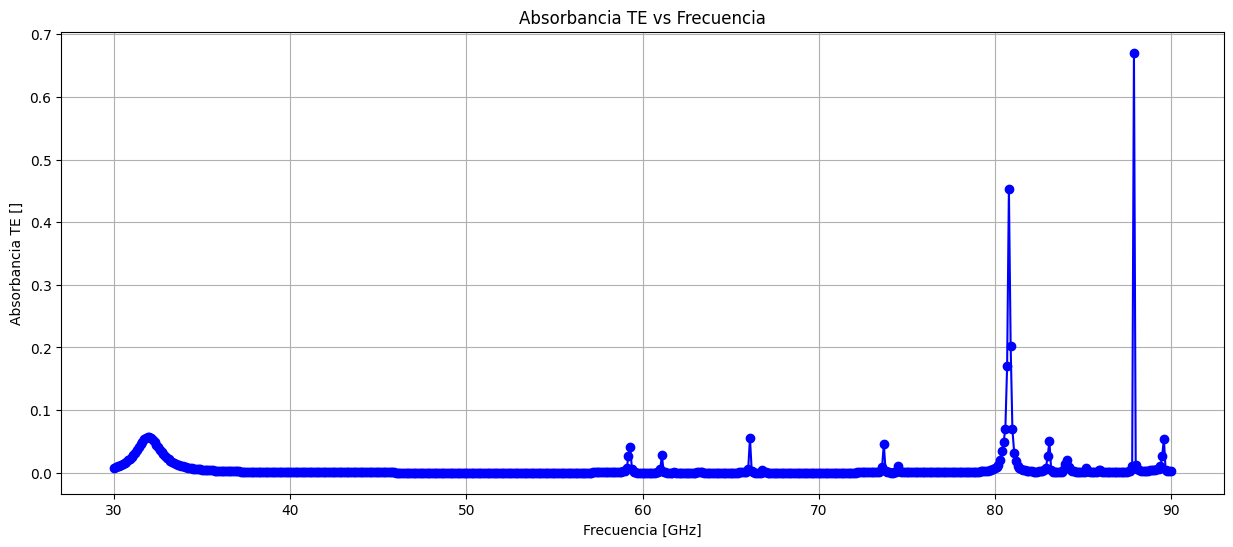

In [12]:
import pandas as pd         # Libreria para trabajar con distintas extensiones de archivos.
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('AbsorbanceTE_0-0.csv')    # df = dataframe

# Obtener los datos de frecuencia y absorbancia del archivo
freq = df['Freq [GHz]']
absorbance = df['AbsorbanceTE []']

# Ajustar el tamaño del grafico
plt.figure(figsize=(15, 6))  # ancho x alto en pulgadas

# Graficar los datos
plt.plot(freq, absorbance, color='blue', marker='o', linestyle='-')
plt.title('Absorbancia TE vs Frecuencia')
plt.xlabel('Frecuencia [GHz]')
plt.ylabel('Absorbancia TE []')
plt.grid(True)
plt.show()

In [10]:
import gzip

# Nombre del archivo comprimido
file_name = 'H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz'

# Nombre del archivo descomprimido
output_file_name = 'archivo.txt'

# Descomprimir el archivo
with gzip.open(file_name, 'rb') as f_in, open(output_file_name, 'wb') as f_out:
    f_out.write(f_in.read())

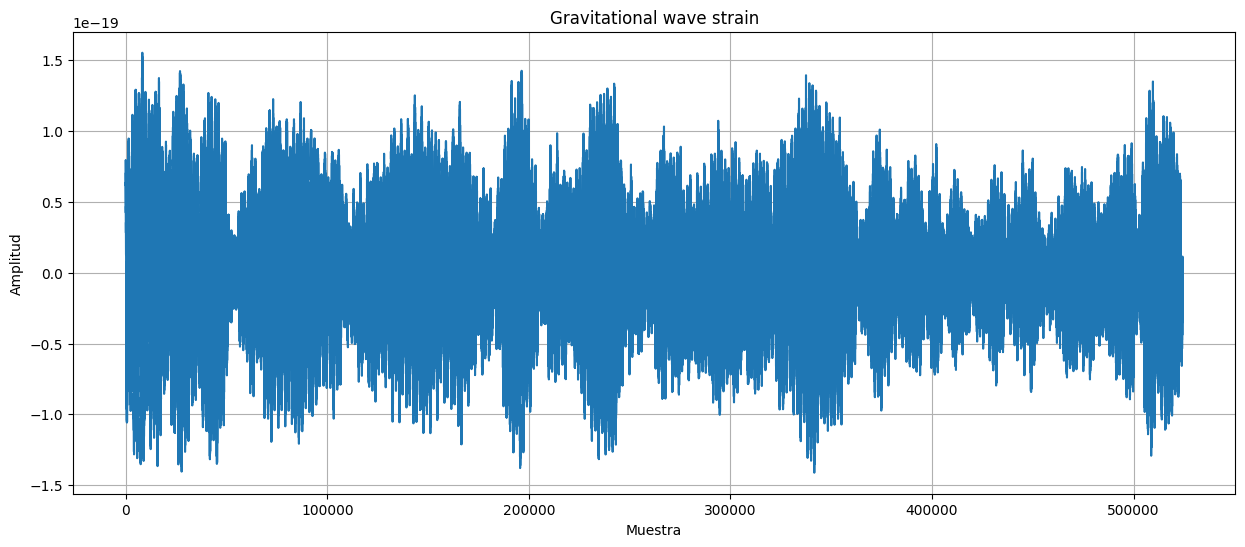

In [13]:
import matplotlib.pyplot as plt

# Cargar el archivo .txt y leer los datos
file_path = 'archivo.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extraer los datos de la lista de líneas, omitiendo las primeras tres líneas de comentarios
data = [float(line.strip()) for line in lines[3:]]

# Ajustar el tamaño del grafico
plt.figure(figsize=(15, 6))  # ancho x alto en pulgadas

# Graficar los datos
plt.plot(data)
plt.title('Gravitational wave strain')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


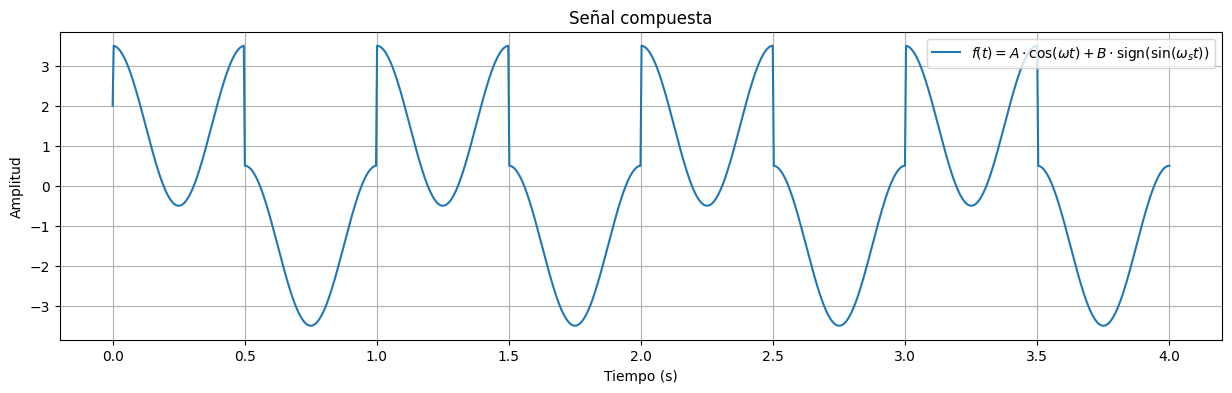

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
A = 2               # Amplitud
B = 1.5             # Amplitud
omega_A = 2*np.pi*2   # Frecuencia angular en rad/s para la cosenoidal
omega_B = 2*np.pi*1 # Frecuencia angular en rad/s para la señal cuadrada

# Función
def signal(t):
    return A * np.cos(omega_A * t) + B * np.sign(np.sin(omega_B * t))

# Generar datos de tiempo
t = np.linspace(0, 4, 1000)

# Calcular valores de la señal
y = signal(t)

# Graficar la señal
plt.figure(figsize=(15, 4))
plt.plot(t, y, label=r'$f(t) = A \cdot \cos(\omega t) + B \cdot \text{sign}(\sin(\omega_s t))$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal compuesta (Coseno pura + Cuadrada)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

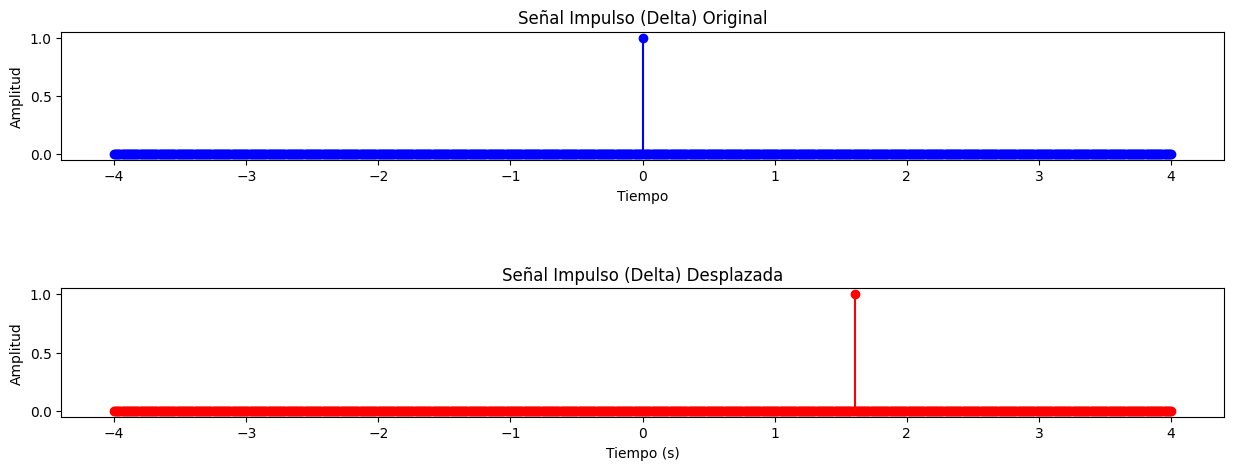

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse

# Definir parámetros
t = np.linspace(-4, 4, 1000)  # Vector de tiempo

# Generar señal impulso (delta)
impulse = unit_impulse(1000, idx=500)  # Impulso en el tiempo t=0

# Desplazar la señal impulso
shifted_impulse = np.roll(impulse, shift=200)  # Desplazamiento de 200 muestras

# Graficar señales
plt.figure(figsize=(15, 5))

# Graficar la señal impulso original
plt.subplot(2, 1, 1)
plt.stem(t, impulse, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Señal Impulso (Delta) Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la señal impulso desplazada
plt.subplot(2, 1, 2)
plt.stem(t, shifted_impulse, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title('Señal Impulso (Delta) Desplazada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
# Ajustar espacio vertical entre los subplots
plt.subplots_adjust(hspace=1)

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

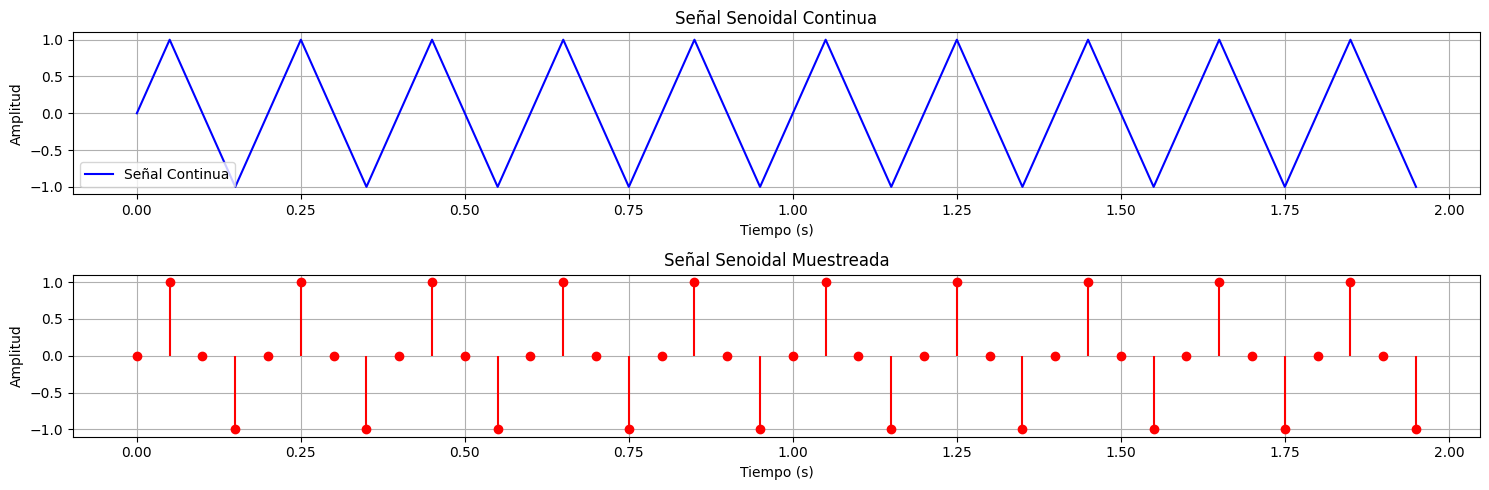

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
frecuencia = 5  # Frecuencia de la señal en Hz
amplitud = 1  # Amplitud de la señal
frecuencia_muestreo = 20  # Frecuencia de muestreo en Hz
duracion = 2  # Duración de la señal en segundos

# Generar la señal senoidal continua
t_continuo = np.linspace(0, duracion, int(frecuencia_muestreo * duracion), endpoint=False)
senoidal_continua = amplitud * np.sin(2 * np.pi * frecuencia * t_continuo)

# Realizar la operación de muestreo
t_muestreado = np.arange(0, duracion, 1 / frecuencia_muestreo)
senoidal_muestreada = amplitud * np.sin(2 * np.pi * frecuencia * t_muestreado)

# Graficar la señal original y la señal muestreada
plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
plt.plot(t_continuo, senoidal_continua, 'b-', label='Señal Continua')  # b- = linea solida azul
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Senoidal Continua')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t_muestreado, senoidal_muestreada, 'r-', markerfmt='ro', basefmt=' ') # r- = linea solida roja
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Senoidal Muestreada')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

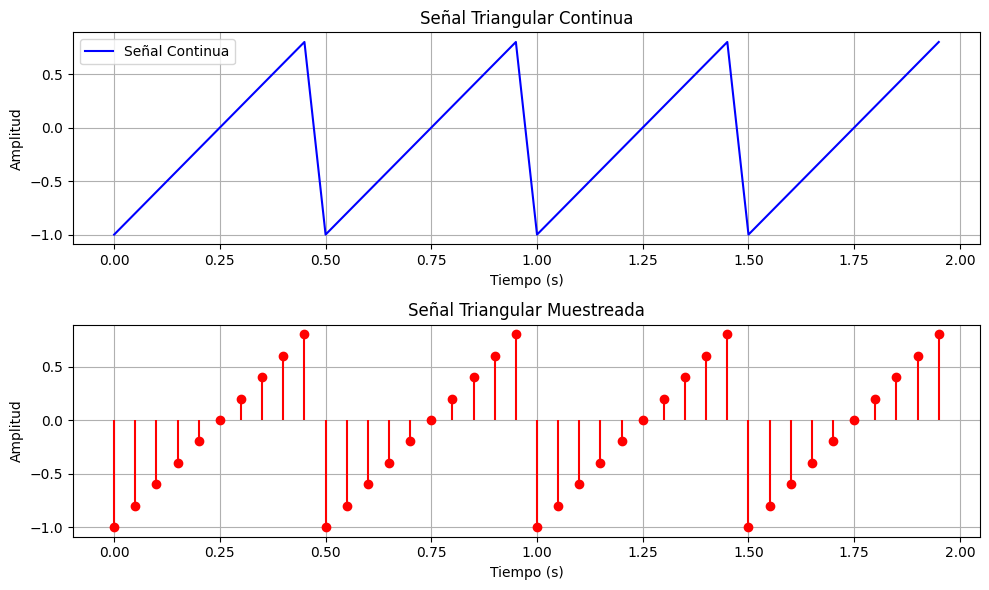

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal triangular
frecuencia = 2  # Frecuencia de la señal en Hz
amplitud = 1    # Amplitud de la señal
pendiente = 0.5  # Pendiente de la señal

# Parámetros de muestreo
frecuencia_muestreo = 20  # Frecuencia de muestreo en Hz
duracion = 2  # Duración de la señal en segundos

# Generar la señal triangular continua
t_continuo = np.linspace(0, duracion, int(frecuencia_muestreo * duracion), endpoint=False)
triangular_continua = amplitud * (2 * np.abs((t_continuo * frecuencia) % 1) - 1)

# Realizar la operación de muestreo
t_muestreado = np.arange(0, duracion, 1 / frecuencia_muestreo)
triangular_muestreada = amplitud * (2 * np.abs((t_muestreado * frecuencia) % 1) - 1)

# Graficar la señal original y la señal muestreada
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_continuo, triangular_continua, 'b-', label='Señal Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Triangular Continua')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t_muestreado, triangular_muestreada, 'r-', markerfmt='ro', basefmt=' ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Triangular Muestreada')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

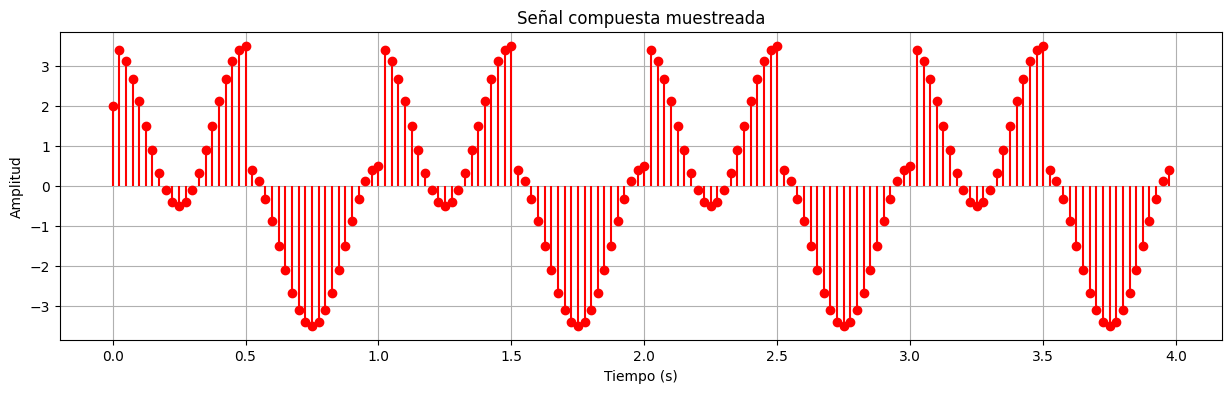

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
A = 2               # Amplitud
B = 1.5             # Amplitud
omega_A = 2*np.pi*2   # Frecuencia angular en rad/s para la cosenoidal
omega_B = 2*np.pi*1 # Frecuencia angular en rad/s para la señal cuadrada

# Función
def signal(t):
    return A * np.cos(omega_A * t) + B * np.sign(np.sin(omega_B * t))

# Generar datos de tiempo
t = np.linspace(0, 4, 1000)

# Calcular valores de la señal
y = signal(t)

# frecuencia de muestreo
frecuencia_muestreo = 40  # Hz

# intervalo de tiempo entre muestras
intervalo_tiempo = 1 / frecuencia_muestreo

# tiempo de muestreo
t_muestreo = np.arange(0, 4, intervalo_tiempo)

# operación de muestreo sobre señal compuesta
y_muestreo = signal(t_muestreo)

# Graficar la señal muestreada
plt.figure(figsize=(15, 4))
plt.stem(t_muestreo, y_muestreo, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal compuesta muestreada')
plt.grid(True)
plt.show()

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

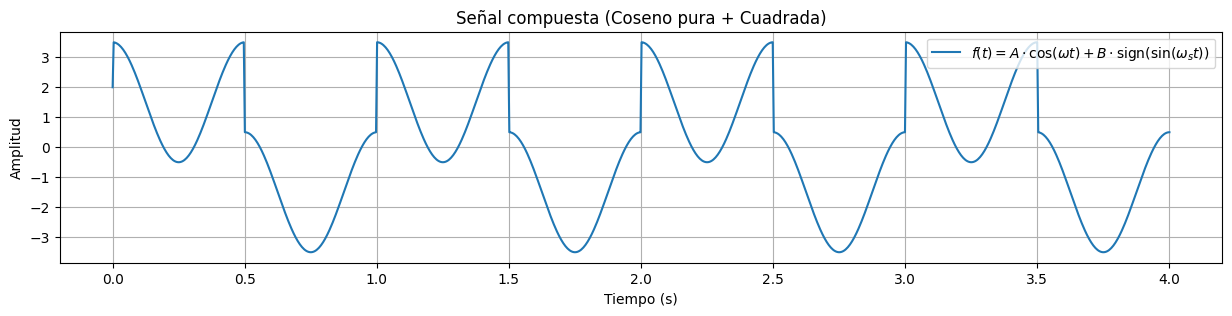

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
A = 2               # Amplitud
B = 1.5             # Amplitud
omega_A = 2*np.pi*2   # Frecuencia angular en rad/s para la cosenoidal
omega_B = 2*np.pi*1 # Frecuencia angular en rad/s para la señal cuadrada

# Función
def signal(t):
    return A * np.cos(omega_A * t) + B * np.sign(np.sin(omega_B * t))

# Generar datos de tiempo
t = np.linspace(0, 4, 1000)

# Calcular valores de la señal
y = signal(t)

# Graficar la señal
plt.figure(figsize=(15, 3))
plt.plot(t, y, label=r'$f(t) = A \cdot \cos(\omega t) + B \cdot \text{sign}(\sin(\omega_s t))$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal compuesta (Coseno pura + Cuadrada)')
plt.legend()
plt.grid(True)
plt.show()

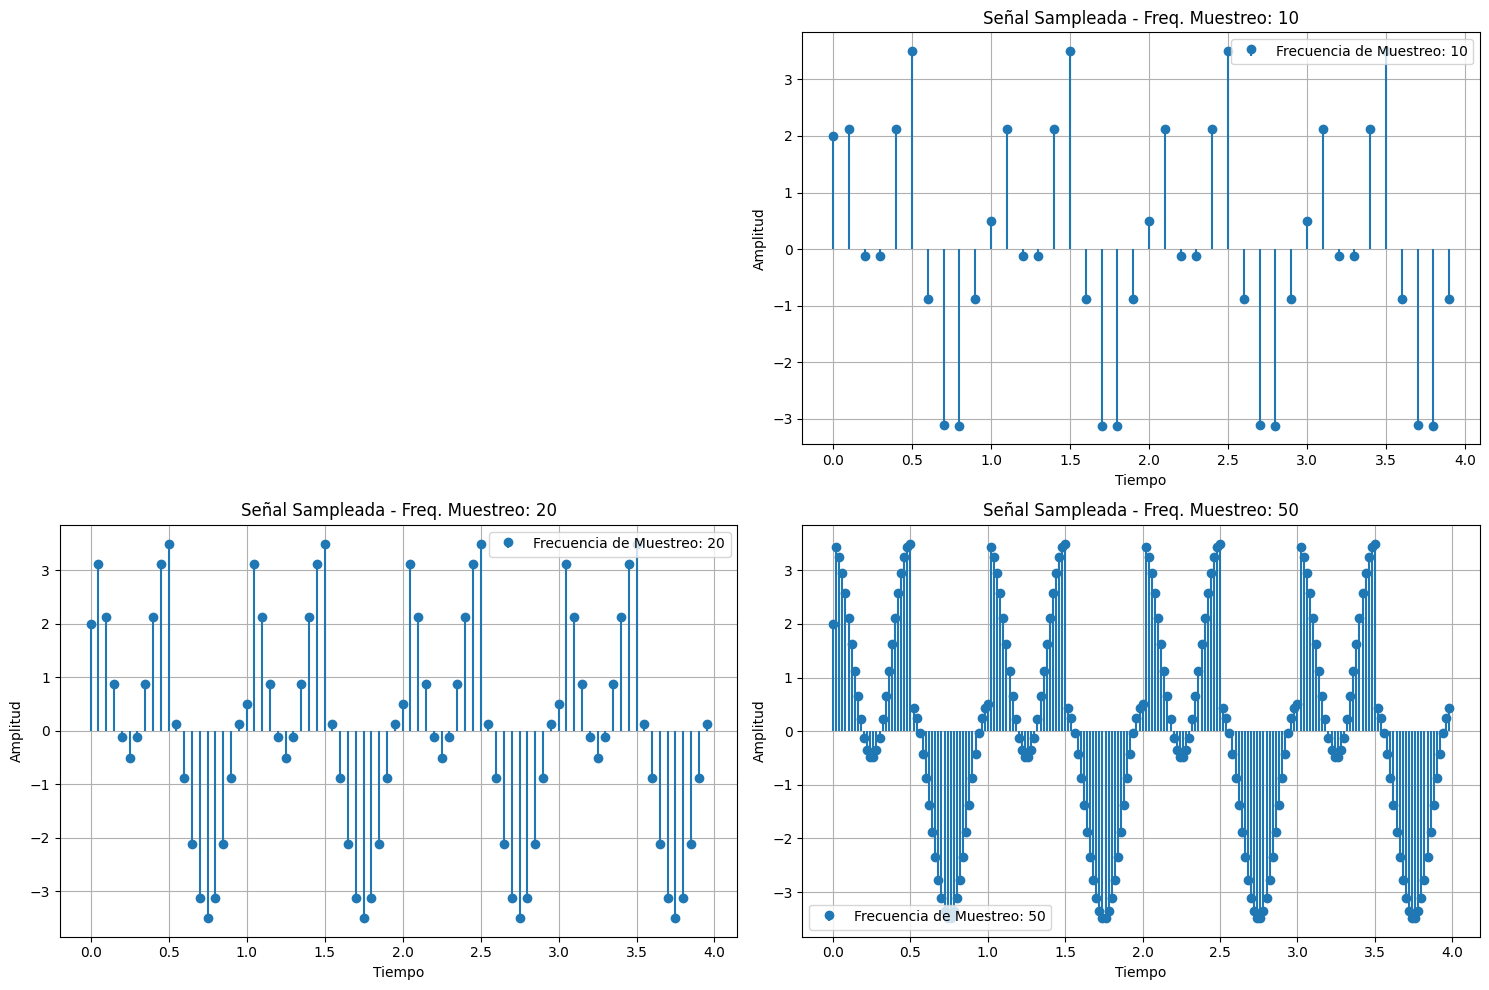

In [54]:
# Frecuencias de muestreo para evaluar
frequencies = [10, 20, 50]  # Frecuencias de muestreo

# Lista para almacenar las señales muestreadas
sampled_signals = []

# Realizar el muestreo para cada frecuencia de muestreo
for f in frequencies:
    # Calcular el intervalo de muestreo
    sample_interval = 1 / f
    
    # Realizar el muestreo de la señal
    sampled_t = np.arange(0, 4, sample_interval)
    sampled_signal = signal(sampled_t)
    sampled_signals.append((sampled_t, sampled_signal))

plt.figure(figsize=(15, 10))

# Gráficos de las señales muestreadas
for i, (sampled_t, sampled_signal) in enumerate(sampled_signals):
    plt.subplot(2, 2, i+2)
    plt.stem(sampled_t, sampled_signal, label=f'Frecuencia de Muestreo: {frequencies[i]}', basefmt=' ')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Señal Sampleada - Freq. Muestreo: {frequencies[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

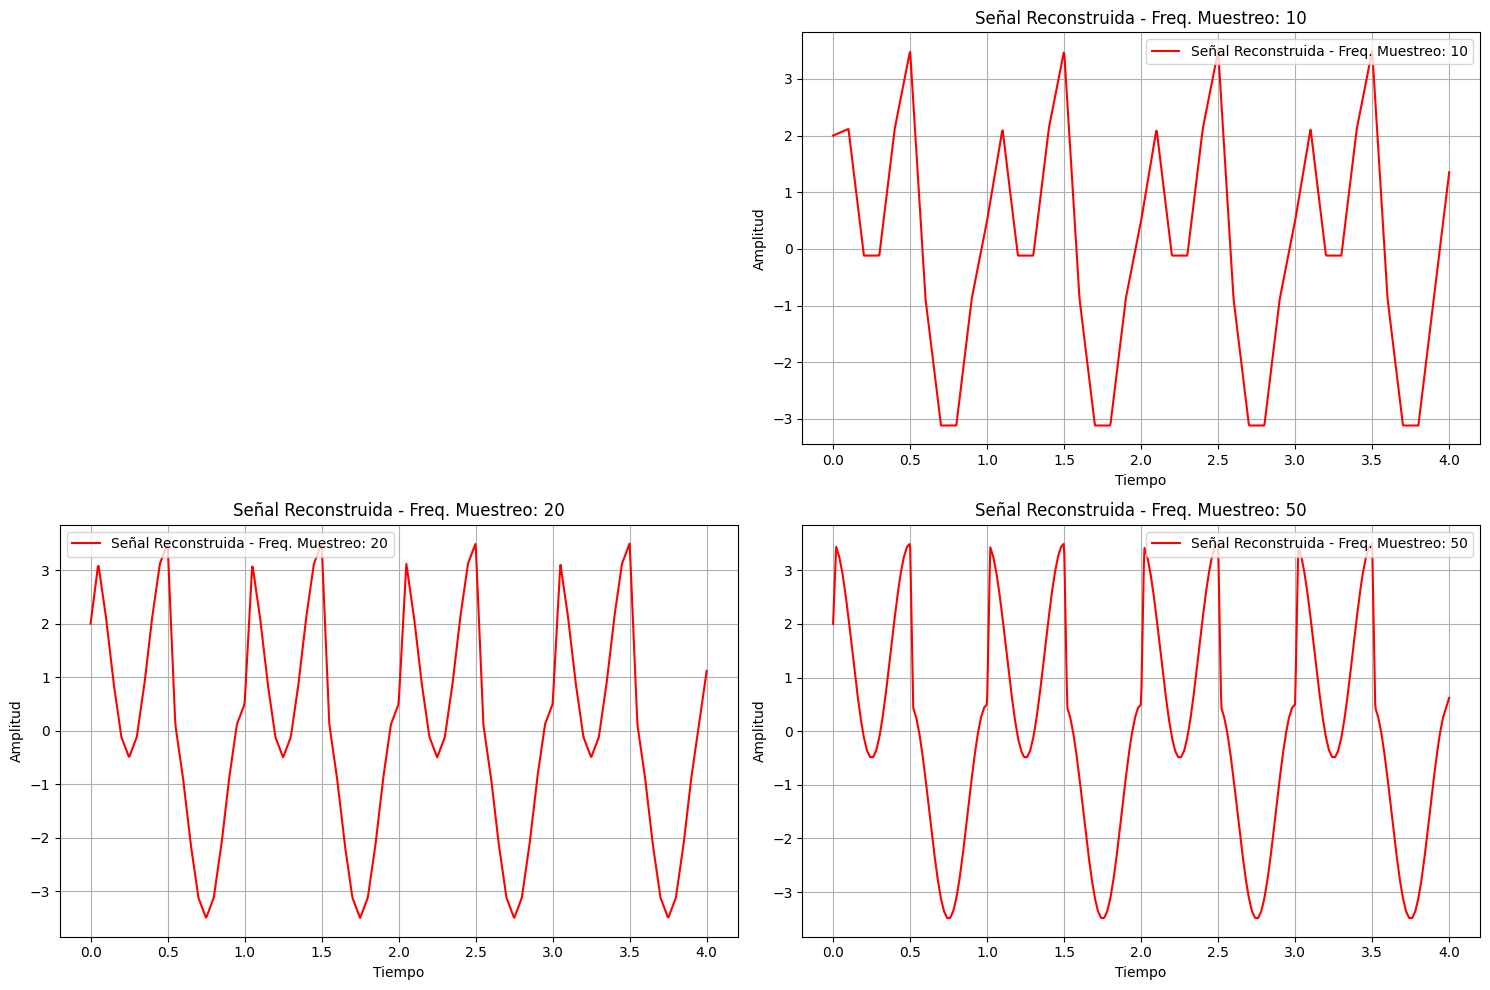

In [55]:
from scipy.interpolate import interp1d

# Lista para almacenar las señales reconstruidas
reconstructed_signals = []

# Reconstruir la señal para cada frecuencia de muestreo
for i, (sampled_t, sampled_signal) in enumerate(sampled_signals):
    # Interpolar la señal sampleada
    interpolator = interp1d(sampled_t, sampled_signal, kind='linear', fill_value='extrapolate')
    
    # Definir el nuevo rango de tiempo para la reconstrucción
    new_t = np.linspace(0, 4, 1000)
    
    # Reconstruir la señal
    reconstructed_signal = interpolator(new_t)
    reconstructed_signals.append((new_t, reconstructed_signal))

plt.figure(figsize=(15, 10))

# Gráficos de las señales reconstruidas
for i, (reconstructed_t, reconstructed_signal) in enumerate(reconstructed_signals):
    plt.subplot(2, 2, i+2)
    plt.plot(reconstructed_t, reconstructed_signal, label=f'Señal Reconstruida - Freq. Muestreo: {frequencies[i]}', color='red')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Señal Reconstruida - Freq. Muestreo: {frequencies[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### 3.6 Explica tus hallazgos

Al samplear la señal a diferentes frecuencias, observamos que la capacidad de reconstruir la señal original varía según la frecuencia de muestreo utilizada. Cuando la frecuencia de muestreo es mayor que la frecuencia máxima de la señal (frecuencia de Nyquist), la señal puede ser reconstruida con mayor fidelidad. Sin embargo, si la frecuencia de muestreo es demasiado baja en relación con la frecuencia máxima de la señal, pueden producirse artefactos de aliasing y la señal reconstruida puede diferir significativamente de la original.

El Teorema de Nyquist establece que para evitar el aliasing, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal a ser muestreada. Esto es crucial para garantizar una reconstrucción precisa de la señal original a partir de sus muestras.

La biblioteca SciPy es una biblioteca de código abierto para matemáticas, ciencia e ingeniería que proporciona muchas herramientas útiles, incluidas funciones para interpolación, optimización, procesamiento de señales, álgebra lineal, estadísticas y mucho más. En el contexto de la reconstrucción de señales, utilizamos la función interp1d de SciPy para interpolar las muestras y así reconstruir la señal original con mayor precisión.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py